# Plotting Hurricane Tracks

This python file takes the cleaned up hurricane data (with coordinates, date, and id) and plots the hurricane paths through a defined circular region (defined by a circular area around a coordinate). 

The color and opacity of the plotted paths represent the strength in certain hurricane variables such as intensity, translation speed or other variables. 



## Finding and plotting the Hurricane Tracks which are a certain distance from the POI

In [304]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from geopy import distance
import cartopy.crs as ccrs
import cartopy

In [305]:
df = pd.read_csv("atlantic_storms_trans_bearing.csv",parse_dates=['date'], index_col=[0])

In [306]:
df.head()

,index,id,name,date,record_identifier,status_of_system,latitude,longitude,maximum_sustained_wind_knots,maximum_pressure,...,64_kt_ne,64_kt_se,64_kt_sw,64_kt_nw,distance,speed,geodesic_distance,speed_geodesic,bearing,category
0,0,AL011851,UNNAMED,1851-06-25 00:00:00,NaN,HU,28.0,-94.8,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.140842,0.0
1,1,AL011851,UNNAMED,1851-06-25 06:00:00,NaN,HU,28.0,-95.4,80,NaN,...,NaN,NaN,NaN,NaN,58.907516,9.817919,59.017061,9.836177,270.140842,0.0
2,2,AL011851,UNNAMED,1851-06-25 12:00:00,NaN,HU,28.0,-96.0,80,NaN,...,NaN,NaN,NaN,NaN,58.907516,9.817919,59.017061,9.836177,282.886140,0.0
3,3,AL011851,UNNAMED,1851-06-25 18:00:00,NaN,HU,28.1,-96.5,80,NaN,...,NaN,NaN,NaN,NaN,50.310977,8.385163,50.391833,8.398639,290.779865,0.0
4,4,AL011851,UNNAMED,1851-06-25 21:00:00,L,HU,28.2,-96.8,80,NaN,...,NaN,NaN,NaN,NaN,31.444370,5.240728,31.482588,5.247098,270.047255,0.0


In [308]:
er = 6371.0 #earth radius in km
columns = ['id','distance_poi','category']
tracks = pd.DataFrame(index=df.index, columns=columns)
tracks.id = df.id
tracks.category = df.category

In [309]:
tracks.head()

,id,distance_poi,category
0,AL011851,NaN,0.0
1,AL011851,NaN,0.0
2,AL011851,NaN,0.0
3,AL011851,NaN,0.0
4,AL011851,NaN,0.0


In [310]:
def get_distance(lat, lon): #desired lat-lon of point of interest 
    #First find our tracks close to the point of interest.
    lat_lon=np.array((df['latitude'].copy(),df['longitude'].copy())).T
    coord_poi = np.array([lat,lon]).T
    for i in df.index:
        tracks.at[i,'distance_poi'] = distance.distance(coord_poi, lat_lon[i]).km 
    return None


In [311]:
def get_local_tracks(radius):
    #Finding data for tracks localized to an area with a defined radius
    global poi_local_index
    global poi_local_tracks
    global poi_local_ids
    poi_local_index = tracks.index[tracks['distance_poi']<=radius]
    poi_local_tracks = df.loc[df['index'].isin(poi_local_index)]
    poi_local_ids = poi_local_tracks.id
    return None
# tracks.index is chosen to specifically look at the points around the point of interest. 

In [312]:
def get_tracks(radius):
    #Finding the tracks
    global poi_ids
    global poi_tracks
    poi_ids = tracks.id[tracks['distance_poi']<=radius].unique()
    poi_tracks = df.loc[df['id'].isin(poi_ids)]
    return None

In [313]:
def plot_tracks(lat, lon, radius):
       
    #Then plot the tracks in a graph on a map
    proj_kwargs = {'central_longitude':lon,
              'central_latitude':lat,
              #'standard_parallels':lat
              }
    ## Plot
    plt.figure(figsize=(12,12))
    
    ax = plt.axes(projection=ccrs.AlbersEqualArea(**proj_kwargs))

    ax.set_extent((lon-20, lon+20, lat-20, lat+20), ccrs.PlateCarree())
    ##Annotate
    ax.coastlines()
    ax.gridlines()
    ax.add_feature(cartopy.feature.STATES)

    ax.coastlines(resolution='50m', color='black', linewidth=1)
    
    for poi_id in poi_ids:
        plt.plot(df.loc[df.id==poi_id].longitude, 
                 df.loc[df.id==poi_id].latitude,
                 color="red",
                 linewidth=0.2,
                 transform = ccrs.PlateCarree())      
    ax.set_title('Hurricanes going through the region with a radius of ' + str(radius)+' km at ' +str(lon)+' lon '+str(lat)+ ' lat from 1851-2019')
    plt.savefig('Paths_'+str(lon)+'_'+str(lat)+'_'+str(radius)+'_km_1851_2019.png')
    return None

In [93]:
get_distance(40.79,-73.13)

In [94]:
get_tracks(100)

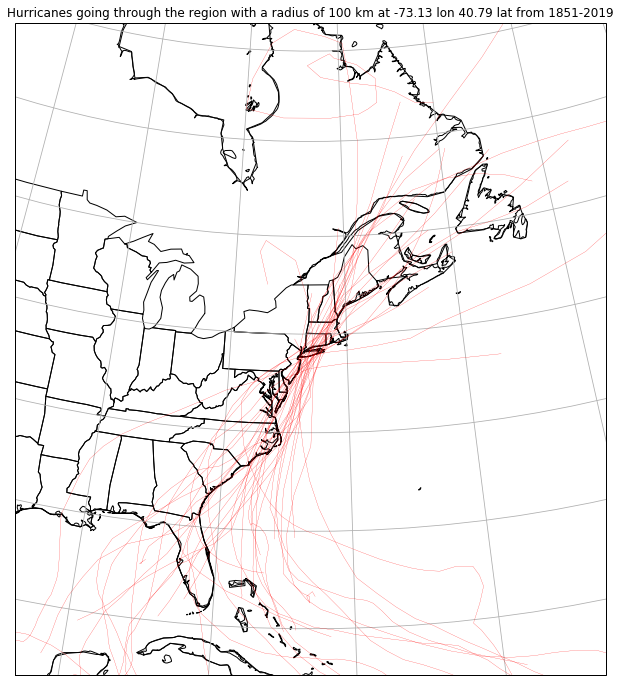

In [95]:
plot_tracks(40.79, -73.13, 100)

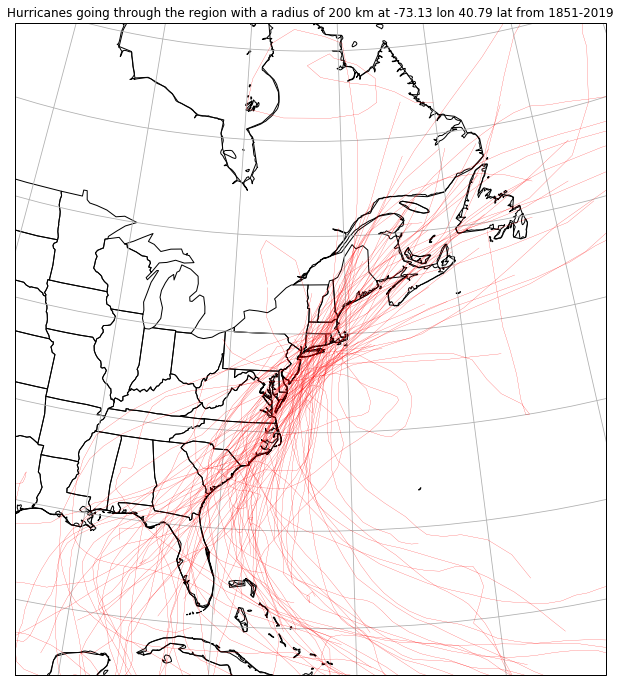

In [96]:
get_tracks(200)
plot_tracks(40.79, -73.13, 200)

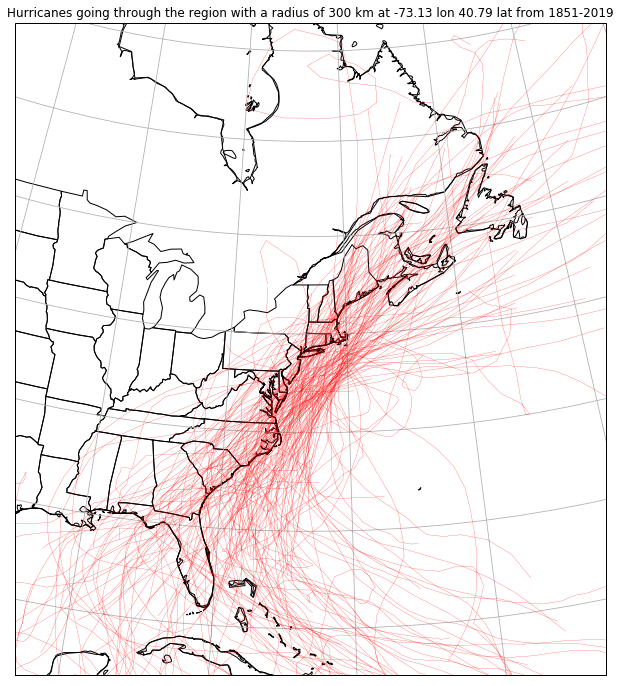

In [97]:
get_tracks(300)
plot_tracks(40.79, -73.13, 300)

In [98]:
def plot_local_tracks(lat, lon, radius):
       
    #Then plot the tracks in a graph on a map
    proj_kwargs = {'central_longitude':lon,
              'central_latitude':lat,
              #'standard_parallels':lat
              }
    ## Plot
    plt.figure(figsize=(12,12))
    
    ax = plt.axes(projection=ccrs.AlbersEqualArea(**proj_kwargs))

    ax.set_extent((lon-5, lon+5, lat-5, lat+5), ccrs.PlateCarree())
    ##Annotate
    ax.coastlines()
    ax.gridlines()
    ax.add_feature(cartopy.feature.STATES)
    ax.coastlines(resolution='50m', color='black', linewidth=1)

    for poi_local_id in poi_local_ids:
        plt.plot(poi_local_tracks.loc[poi_local_tracks['id']==poi_local_id].longitude,
                 poi_local_tracks.loc[poi_local_tracks['id']==poi_local_id].latitude,
                 color="red",
                 linewidth=0.2,
                 transform = ccrs.PlateCarree() )      
    ax.set_title('Local Hurricanes around ' + str(radius)+' km at ' +str(lon)+' lon '+str(lat)+ ' lat from 1851-2019')
    plt.savefig('Locals_'+str(lon)+'_'+str(lat)+'_'+str(radius)+'_km_1851_2019.png')
    return None

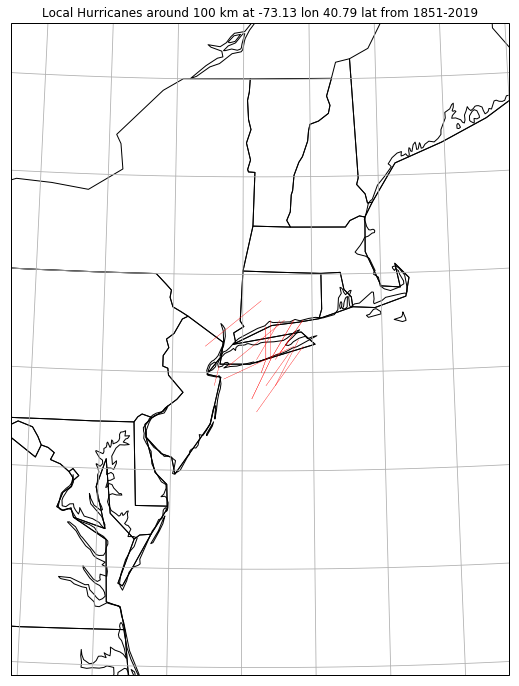

In [99]:
get_local_tracks(100)
plot_local_tracks(40.79, -73.13, 100)

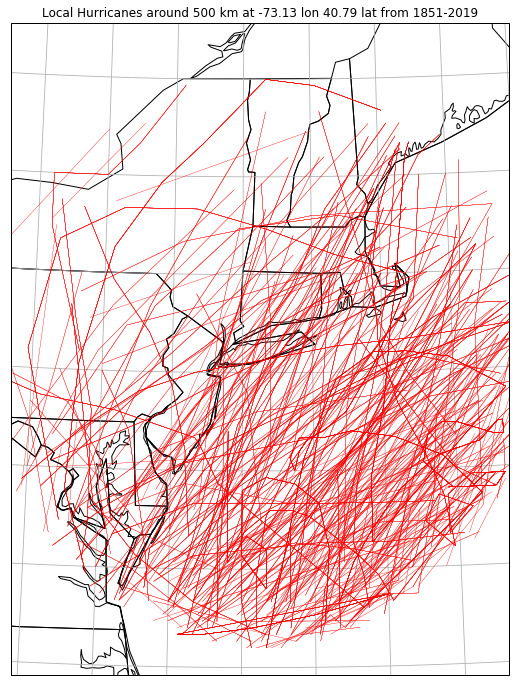

In [343]:
get_local_tracks(500)
plot_local_tracks(40.79, -73.13, 500)

In [331]:
get_distance(25.83, -80.18)

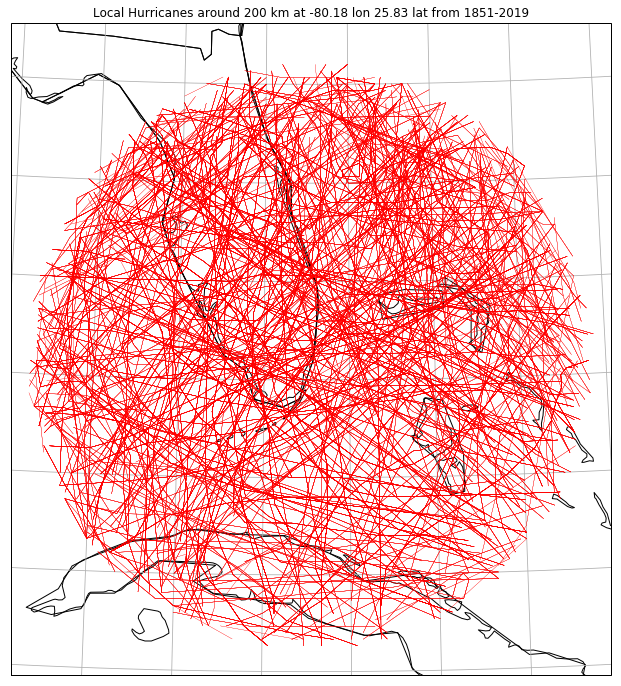

In [333]:
get_local_tracks(500)
plot_local_tracks(25.83, -80.18, 200)

## Plotting different category hurricanes on a map

In [101]:
Categories = df.groupby(['category'])
df1=Categories.get_group(1)
df2=Categories.get_group(2)
df3=Categories.get_group(3)
df4=Categories.get_group(4)
df5=Categories.get_group(5)

In [102]:
get_tracks(300)

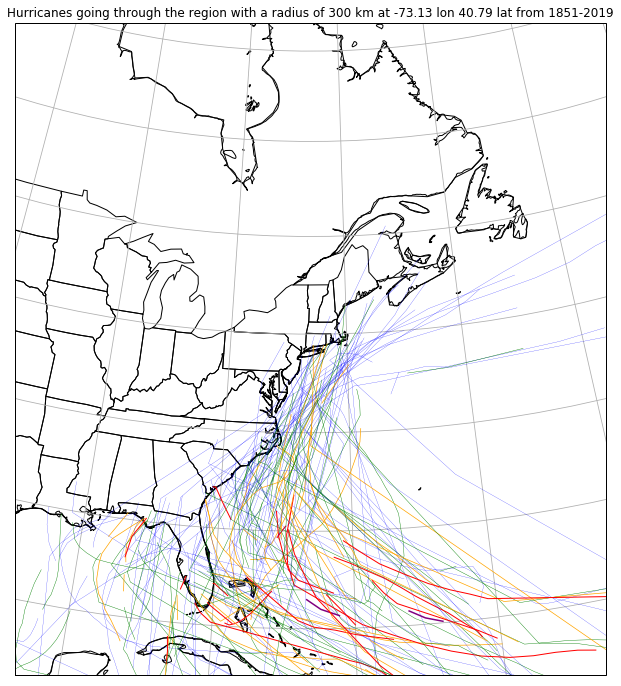

In [103]:
coord_poi = (40.79, -73.13)
lon = coord_poi[1]
lat = coord_poi[0]

proj_kwargs = {'central_longitude':lon,
              'central_latitude':lat,
              #'standard_parallels':lat
              }
## Plot
plt.figure(figsize=(12,12))
plt.tight_layout()
ax = plt.axes(projection=ccrs.AlbersEqualArea(**proj_kwargs))

ax.set_extent((lon-20, lon+20, lat-20, lat+20), ccrs.PlateCarree())
##Annotate
ax.coastlines()
ax.gridlines()
ax.add_feature(cartopy.feature.STATES)

ax.coastlines(resolution='50m', color='black', linewidth=1)

for poi_id in poi_ids:
    plt.plot(df1.loc[df1.id==poi_id].longitude, 
             df1.loc[df1.id==poi_id].latitude,
             color='blue',
             linewidth=0.2,
             transform = ccrs.PlateCarree())
    plt.plot(df2.loc[df2.id==poi_id].longitude, 
             df2.loc[df2.id==poi_id].latitude,
             color='green',
             linewidth=0.4,
             transform = ccrs.PlateCarree())
    plt.plot(df3.loc[df3.id==poi_id].longitude, 
             df3.loc[df3.id==poi_id].latitude,
             color='orange',
             linewidth=0.7,
             transform = ccrs.PlateCarree())
    plt.plot(df4.loc[df4.id==poi_id].longitude, 
             df4.loc[df4.id==poi_id].latitude,
             color='red',
             linewidth=1,
             transform = ccrs.PlateCarree())
    plt.plot(df5.loc[df5.id==poi_id].longitude, 
             df5.loc[df5.id==poi_id].latitude,
             color='purple',
             linewidth=1.5,
             transform = ccrs.PlateCarree())
#ax.legend()
ax.set_title('Hurricanes going through the region with a radius of 300 km at ' +str(lon)+' lon '+str(lat)+ ' lat from 1851-2019')
plt.savefig('Hurricane_categories_at ' +str(lon)+' lon '+str(lat)+'.png')


In [326]:
colors = ['aqua','yellow','blue','darkblue', 'green', 'orange', 'red','pink', 'purple', 'brown','grey', 'black']
color = []
for i in df.loc[df.id == poi_id].category:
    color.append(colors[int(i)])
print(color)

['aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua']


In [175]:
a=[]
for i in range(5):    
    a.append(i)
a

[0, 1, 2, 3, 4]

In [186]:
## Getting the poi_id_strong hurricane ids around the point of interest that have hurricane categories 4 or above.
poi_id_strong = []
for poi_id in poi_ids:
    for i in df.loc[df.id == poi_id].category:
        if i >= 4:
            poi_id_strong.append(poi_id)
poi_id_strong

['AL061938', 'AL061938', 'AL061938']

In [287]:
def get_local_strong_tracks():
    #Finding data for strong hurricane tracks that passed through a specific area. 
    global poi_strong_tracks
    global poi_local_strong_ids
    poi_local_strong_ids = []
    for poi_local_id in poi_local_ids:
        for i in tracks.loc[tracks.id == poi_local_id].category:
            if i >= 2:
                poi_local_strong_ids.append(poi_local_id)
    poi_local_strong_ids = np.unique(np.array(poi_local_strong_ids))
    poi_strong_tracks = df.loc[df['id'].isin(poi_local_strong_ids)]
    return None
# tracks.index is chosen to specifically look at the points around the point of interest. 

In [317]:
get_local_tracks(500)
get_local_strong_tracks()

In [339]:
get_distance(40.79, -73.13)

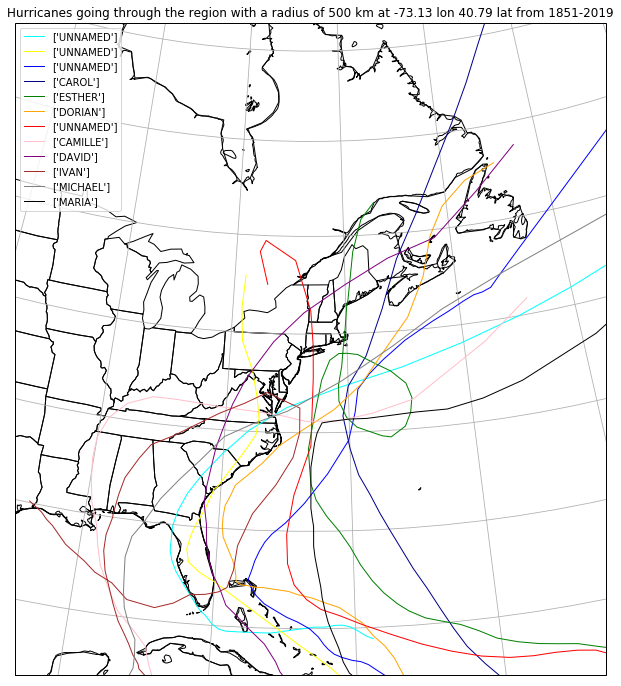

In [330]:
coord_poi = (40.79, -73.13)
lon = coord_poi[1]
lat = coord_poi[0]


proj_kwargs = {'central_longitude':lon,
              'central_latitude':lat,
              #'standard_parallels':lat
              }
## Plot
plt.figure(figsize=(12,12))
plt.tight_layout()
ax = plt.axes(projection=ccrs.AlbersEqualArea(**proj_kwargs))

ax.set_extent((lon-20, lon+20, lat-20, lat+20), ccrs.PlateCarree())
##Annotate
ax.coastlines()
ax.gridlines()
ax.add_feature(cartopy.feature.STATES)

ax.coastlines(resolution='50m', color='black', linewidth=1)
count = 0
for poi_local_strong_id in poi_local_strong_ids:

    plt.plot(poi_strong_tracks.loc[poi_strong_tracks.id == poi_local_strong_id].longitude,
             poi_strong_tracks.loc[poi_strong_tracks.id == poi_local_strong_id].latitude,
             label = poi_strong_tracks[poi_strong_tracks.id == poi_local_strong_id].name.unique(),
             color = colors[count],
             linewidth=1,
             transform = ccrs.PlateCarree())
    count += 1
plt.legend()             

#ax.legend()
ax.set_title('Hurricanes going through the region with a radius of 500 km at ' +str(lon)+' lon '+str(lat)+ ' lat from 1851-2019')
plt.savefig('Strong Hurricanes 500km radius of' +str(lon)+' lon '+str(lat)+'.png')


In [267]:
poi_strong_tracks[poi_strong_tracks.id == poi_local_strong_id].name.unique()
#[poi_strong_tracks.id == poi_local_strong_id].name

array(['UNNAMED'], dtype=object)

In [325]:

count

11

In [248]:
poi_strong_tracks.id

18919    AL061938
18920    AL061938
18921    AL061938
18922    AL061938
18923    AL061938
           ...   
26143    AL051961
26144    AL051961
26145    AL051961
26146    AL051961
26147    AL051961
Name: id, Length: 127, dtype: object

## Plotting Distributions


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns


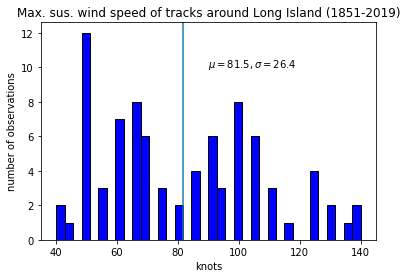

In [105]:
## Testing out putting text and vertical lines etc. on histograms. 
get_tracks(200)
coord_poi = (40.79, -73.13)
lon = coord_poi[1]
lat = coord_poi[0]
radius = 200
#Histogram Max Wind Speed of each track
poi_tracks_max_per_storm = poi_tracks.loc[poi_tracks.groupby(['id'])['maximum_sustained_wind_knots'].idxmax()]
#del poi_tracks_max_per_storm['Unnamed: 0']
# Matplotlib histogram (max. wind speed)
plt.hist(poi_tracks_max_per_storm['maximum_sustained_wind_knots'], color='blue', edgecolor = 'black', bins=36)
plt.axvline(poi_tracks_max_per_storm['maximum_sustained_wind_knots'].mean())
mean = round(poi_tracks_max_per_storm['maximum_sustained_wind_knots'].mean(), 1)
std = round(poi_tracks_max_per_storm['maximum_sustained_wind_knots'].std(), 1)
#plt.text(90, 4, r'$\mu=$' +str(mean)+ r'$, \sigma=$'+str(std))
plt.text(90, 10, r'$\mu=$' +str(mean)+ r'$, \sigma=$'+str(std))
plt.title('Max. sus. wind speed of tracks around Long Island (1851-2019)')  
plt.xlabel('knots')
plt.ylabel('number of observations')
#plt.savefig("Test_text_hist_intensity_200km.png")
plt.savefig("Test_text_line_hist_intensity_200km.png")

In [364]:
def hist_max_wind_speed(lat,lon,radius):   
    #Histogram Max Wind Speed of each track
    poi_tracks_max_per_storm = poi_tracks.loc[poi_tracks.groupby(['id'])['maximum_sustained_wind_knots'].idxmax()]
    #del poi_tracks_max_per_storm['Unnamed: 0']
    # Matplotlib histogram (max. wind speed)
    plt.hist(poi_tracks_max_per_storm['maximum_sustained_wind_knots'], color='blue', edgecolor = 'black', bins=36)
    
    plt.title('Max. sus. wind speed of tracks with a distance of ' + str(radius) + ' km to ('+str(lat)+','+str(lon)+') (1851-2019)')  
    plt.xlabel('knots')
    plt.ylabel('number of observations')
   
    plt.savefig('max_sust_wind_speed_of_hurricanes_passing_within_'+ str(radius) +'_km_of_'+'('+str(lat)+','+str(lon)+')_1851_2019.png')
    return None
def hist_translation_speed(lat,lon,radius):
    # Histogram (translation speed)
    plt.hist(poi_tracks.speed_geodesic[poi_tracks['speed_geodesic'].notnull()], color='blue', edgecolor = 'black', bins=36)
    plt.title('Translation speed of tracks with a distance of ' + str(radius) + ' km to ('+str(lat)+','+str(lon)+') (1851-2019)')
    plt.xlabel('km/h')
    plt.ylabel('number of observations')
    plt.savefig('trans_speed_of_tracks_passing_within_'+ str(radius) +'_km_of_'+'('+str(lat)+','+str(lon)+')_1851_2019.png')
    return None
def hist_bearings(lat,lon,radius):
    # Histogram Translation Directions(bearing)
    
    plt.hist(poi_tracks.bearing[poi_tracks['bearing'].notnull()], color = 'blue', edgecolor = 'black', bins=36)
    plt.title('Translation direction/bearing(mathematical direction) of '+name + str(radius) + ' km to ('+str(lat)+','+str(lon)+') (1851-2019)')
    plt.xlabel('degrees')
    plt.ylabel('number of observations')
    
    plt.savefig('bearing_from_tracks_passing_within_'+ str(radius) +'_km_of_'+'('+str(lat)+','+str(lon)+')_1851_2019.png')

In [365]:
def hist_max_wind_speed_local(lat,lon,radius):   
    #Histogram Max Wind Speed of each track
    poi_tracks_max_per_storm = poi_local_tracks.loc[poi_local_tracks.groupby(['id'])['maximum_sustained_wind_knots'].idxmax()]
    #del poi_tracks_max_per_storm['Unnamed: 0']
    # Matplotlib histogram (max. wind speed)
    plt.hist(poi_tracks_max_per_storm['maximum_sustained_wind_knots'], color='blue', edgecolor = 'black', bins=36)
    plt.axvline(poi_tracks_max_per_storm['maximum_sustained_wind_knots'].mean())
    mean = round(poi_tracks_max_per_storm['maximum_sustained_wind_knots'].mean(), 1)
    std = round(poi_tracks_max_per_storm['maximum_sustained_wind_knots'].std(), 1)
    plt.title('Max. sus. wind speed ' r'$\mu=$' +str(mean)+ r'$, \sigma=$'+str(std)+' radius: ' + str(radius) + ' km')  
    plt.xlabel('knots')
    plt.ylabel('number of observations')
    plt.savefig('max_sust_wind_speed_of_locals_passing_within_'+ str(radius) +'_km_of_'+'('+str(lat)+','+str(lon)+')'+'_1851_2019.png')
    return None
def hist_translation_speed_local(lat,lon,radius):
    # Histogram (translation speed)
    poi_tracks_translation_speed = poi_local_tracks.speed_geodesic[poi_local_tracks['speed_geodesic'].notnull()]
    plt.hist(poi_tracks_translation_speed, color='blue', edgecolor = 'black', bins=36)
    plt.axvline(poi_tracks_translation_speed.mean())
    mean = round(poi_tracks_translation_speed.mean(), 1)
    std = round(poi_tracks_translation_speed.std(), 1)
    plt.title('Translation speed ' r'$\mu=$' +str(mean)+ r'$, \sigma=$'+str(std)+' radius: ' + str(radius) + ' km')
    plt.xlabel('km/h')
    plt.ylabel('number of observations')
    plt.savefig('trans_speed_of_locals_passing_within_'+ str(radius) +'_km_of_'+'('+str(lat)+','+str(lon)+')'+'_1851_2019.png')
    return None
def hist_bearings_local(lat,lon,radius):
    # Histogram Translation Directions(bearing)
    bearing = poi_local_tracks.bearing[poi_local_tracks['bearing'].notnull()]
    plt.hist(bearing, color = 'blue', edgecolor = 'black', bins=36)
    plt.axvline(bearing.mean())
    mean = round(bearing.mean(), 1)
    std = round(bearing.std(), 1)                                       
    plt.title('Translation direction/bearing ' r'$\mu=$' +str(mean)+ r'$, \sigma=$'+str(std)+' radius: ' + str(radius) + ' km')
    plt.xlabel('degrees')
    plt.ylabel('number of observations')
    plt.savefig('bearing_from_locals_passing_within_'+ str(radius) +'_km_of_'+'('+str(lat)+','+str(lon)+')'+'_1851_2019.png')

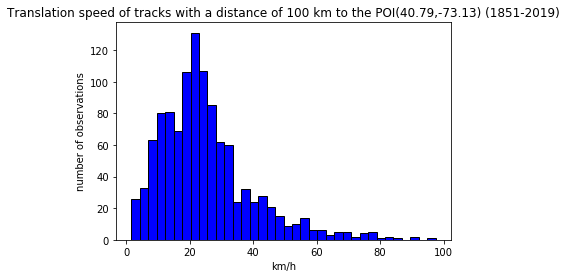

In [108]:
get_tracks(100)
hist_translation_speed(40.79,-73.13,100)

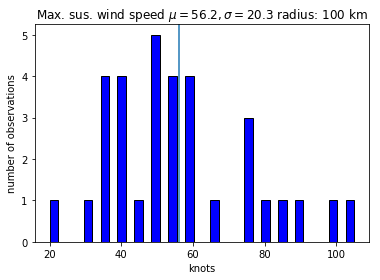

In [109]:
get_local_tracks(100)
hist_max_wind_speed_local(40.79,-73.13,100)


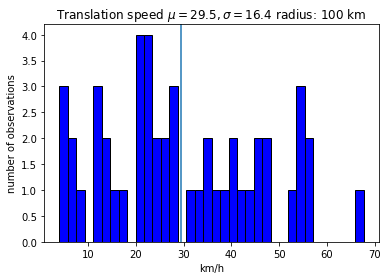

In [110]:
hist_translation_speed_local(40.79,-73.13,100)

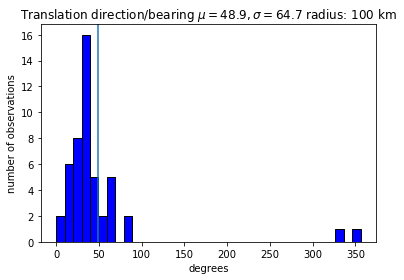

In [111]:
hist_bearings_local(40.79,-73.13,100)

In [366]:
get_distance(40.79,-73.13)
get_local_tracks(500)

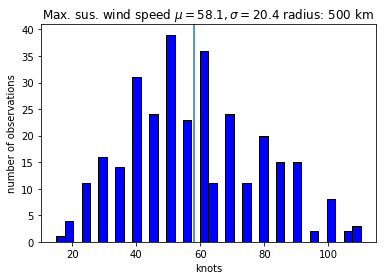

In [367]:
get_local_tracks(500)
hist_max_wind_speed_local(40.79,-73.13,500)


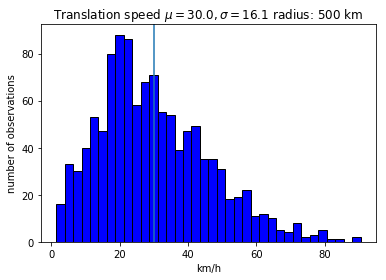

In [368]:
hist_translation_speed_local(40.79,-73.13,500)

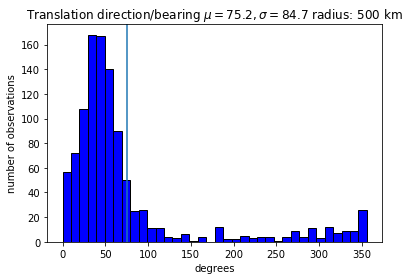

In [369]:
hist_bearings_local(40.79,-73.13,500)

In [370]:
get_distance(25.83, -80.18)
get_local_tracks(500)

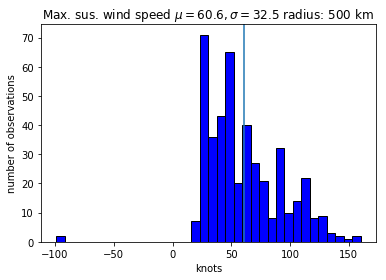

In [371]:
hist_max_wind_speed_local(25.83, -80.18, 500)

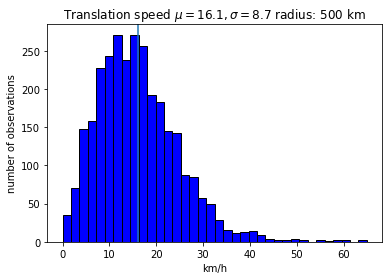

In [372]:
hist_translation_speed_local(25.83, -80.18, 500)

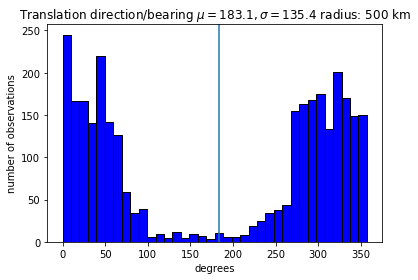

In [373]:
hist_bearings_local(25.83, -80.18, 500)

## Specially strong Hurricane Tracks

In [193]:

df[df['name'].isin(['SANDY'])].head()
#df_strong = df[df[category].isin([4,5])]

,index,id,name,date,record_identifier,status_of_system,latitude,longitude,maximum_sustained_wind_knots,maximum_pressure,...,64_kt_ne,64_kt_se,64_kt_sw,64_kt_nw,distance,speed,geodesic_distance,speed_geodesic,bearing,category
48506,48506,AL182012,SANDY,2012-10-21 18:00:00,NaN,LO,14.3,-77.4,25,1006.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,224.172662,0.0
48507,48507,AL182012,SANDY,2012-10-22 00:00:00,NaN,LO,13.9,-77.8,25,1005.0,...,0.0,0.0,0.0,0.0,61.960973,10.326829,61.841622,10.306937,224.220780,0.0
48508,48508,AL182012,SANDY,2012-10-22 06:00:00,NaN,LO,13.5,-78.2,25,1003.0,...,0.0,0.0,0.0,0.0,62.012930,10.335488,61.892451,10.315409,224.267420,0.0
48509,48509,AL182012,SANDY,2012-10-22 12:00:00,NaN,TD,13.1,-78.6,30,1002.0,...,0.0,0.0,0.0,0.0,62.063465,10.343911,61.941888,10.323648,193.706681,0.0
48510,48510,AL182012,SANDY,2012-10-22 18:00:00,NaN,TS,12.7,-78.7,35,1000.0,...,0.0,0.0,0.0,0.0,45.779580,7.629930,45.563249,7.593875,108.828607,0.0


KeyError: False

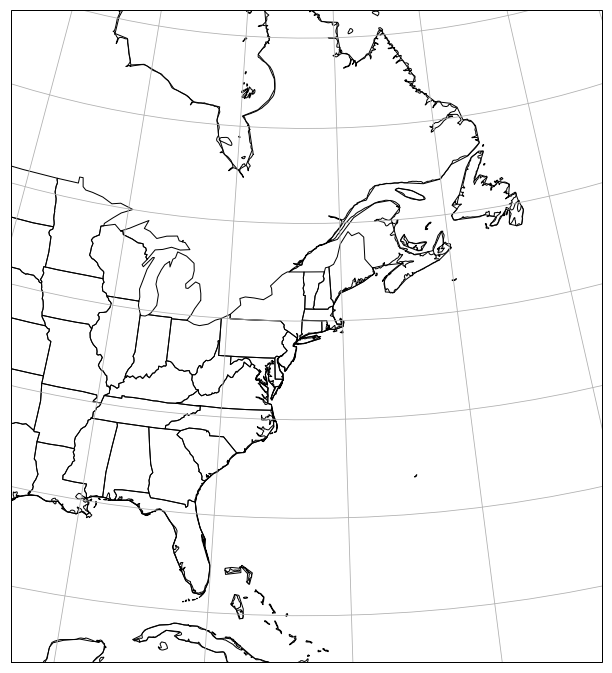

In [73]:
coord_poi = (40.79, -73.13)
lon = coord_poi[1]
lat = coord_poi[0]

proj_kwargs = {'central_longitude':lon,
              'central_latitude':lat,
              #'standard_parallels':lat
              }
## Plot
plt.figure(figsize=(12,12))
plt.tight_layout()
ax = plt.axes(projection=ccrs.AlbersEqualArea(**proj_kwargs))

ax.set_extent((lon-20, lon+20, lat-20, lat+20), ccrs.PlateCarree())
##Annotate
ax.coastlines()
ax.gridlines()
ax.add_feature(cartopy.feature.STATES)

ax.coastlines(resolution='50m', color='black', linewidth=1)

for name in df.name:
    plt.plot(df.loc[name=='SANDY'].longitude, 
             df1.loc[name=='SANDY'].latitude,
             color='blue',
             linewidth=0.2,
             transform = ccrs.PlateCarree())
    
ax.set_title('Hurricanes going through the region with a radius of 300 km at ' +str(lon)+' lon '+str(lat)+ ' lat from 1851-2019')
#plt.savefig('Hurricane_categories_at ' +str(lon)+' lon '+str(lat)+'.png')

### Point of maximum value among the points (usually 1-2 points) within 150 km of the poi 

In [33]:
poi_tracks_max_per_storm = poi_tracks.loc[poi_tracks.groupby(['id'])['maximum_sustained_wind_knots'].idxmax()]
#del poi_tracks_max_per_storm['Unnamed: 0']
print(poi_tracks_max_per_storm.maximum_sustained_wind_knots.mean())
poi_tracks_max_per_storm.head()

#df.loc[df.reset_index().groupby(['F_Type'])['to_date'].idxmax()]

81.66666666666667


,index,id,name,date,record_identifier,status_of_system,latitude,longitude,maximum_sustained_wind_knots,maximum_pressure,...,64_kt_ne,64_kt_se,64_kt_sw,64_kt_nw,distance,speed,geodesic_distance,speed_geodesic,bearing,category
12687,12687,AL011915,UNNAMED,1915-08-01 12:00:00,NaN,HU,28.4,-80.3,65,NaN,...,NaN,NaN,NaN,NaN,59.256675,9.876112,59.269886,9.878314,304.454696,1.0
12939,12939,AL011916,UNNAMED,1916-05-17 12:00:00,NaN,EX,41.0,-72.5,50,990.0,...,NaN,NaN,NaN,NaN,280.124188,46.687365,280.129908,46.688318,28.634175,NaN
17561,17561,AL011934,UNNAMED,1934-06-14 18:00:00,NaN,HU,23.7,-91.8,85,NaN,...,NaN,NaN,NaN,NaN,69.768987,11.628164,69.523439,11.587240,16.895702,2.0
4933,4933,AL021886,UNNAMED,1886-06-20 00:00:00,NaN,HU,24.3,-84.9,85,NaN,...,NaN,NaN,NaN,NaN,59.190419,9.865070,58.997445,9.832907,24.423212,2.0
30959,30959,AL021972,AGNES,1972-06-19 00:00:00,NaN,HU,26.0,-85.7,75,982.0,...,NaN,NaN,NaN,NaN,133.433912,22.238985,132.934683,22.155781,0.000000,1.0


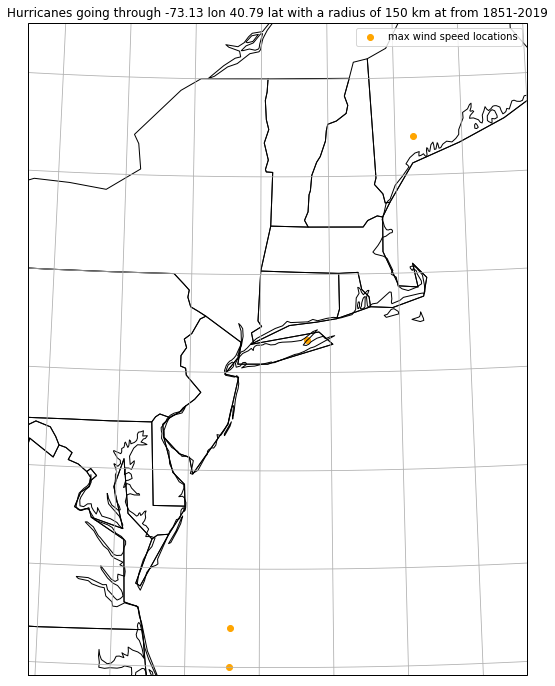

In [34]:
## Double Check, plotting the locations of these tracks
lat = 40.79
lon = -73.13
radius = 150
proj_kwargs = {'central_longitude':lon,
              'central_latitude':lat,
              #'standard_parallels':lat
              }
## Plot
plt.figure(figsize=(12,12))
plt.tight_layout()
ax = plt.axes(projection=ccrs.AlbersEqualArea(**proj_kwargs))

ax.set_extent((lon-5, lon+5, lat-5, lat+5), ccrs.PlateCarree())
##Annotate
ax.coastlines()
ax.gridlines()
ax.add_feature(cartopy.feature.STATES)

ax.coastlines(resolution='50m', color='black', linewidth=1)

plt.scatter(poi_tracks_max_per_storm.longitude,
            poi_tracks_max_per_storm.latitude,
            color='orange',
            label = 'max wind speed locations',
            transform = ccrs.PlateCarree())


ax.legend()
ax.set_title('Hurricanes going through ' +str(lon)+' lon '+str(lat)+ ' lat with a radius of ' + str(radius)+' km at from 1851-2019')
plt.savefig('Scatter_max_speed_locations.png')


### Point of tracks with the closest distance to the POI.

In [73]:
poi_tracks_closest_dist = poi_tracks.loc[tracks.groupby(['id'])['distance_poi'].idxmin()]
#del poi_tracks_closest_dist['Unnamed: 0']
print(poi_tracks_closest_dist.maximum_sustained_wind_knots.mean())
poi_tracks_closest_dist.count()

KeyError: 'Column not found: distance_poi'

In [35]:
tracks.groupby

<bound method NDFrame.groupby of              id distance_poi
0      AL011851      2434.88
1      AL011851      2479.43
2      AL011851      2524.35
3      AL011851      2554.99
4      AL011851      2570.77
...         ...          ...
51848  AL202019       4891.6
51849  AL202019       4918.4
51850  AL202019      4974.74
51851  AL202019      5133.33
51852  AL202019      5398.01

[51853 rows x 2 columns]>

NameError: name 'poi_tracks_closest_dist' is not defined

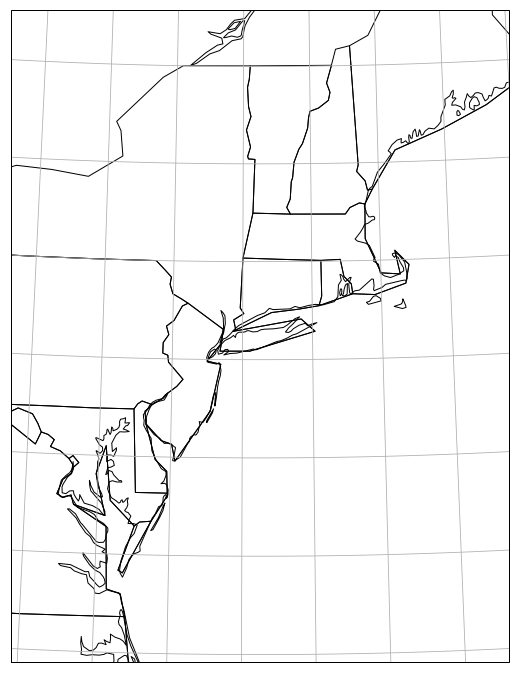

In [36]:
## Double Check, plotting the locations of these tracks
lat = 40.79
lon = -73.13
radius = 150
proj_kwargs = {'central_longitude':lon,
              'central_latitude':lat,
              #'standard_parallels':lat
              }

## Plot
plt.figure(figsize=(12,12))
plt.tight_layout()
ax = plt.axes(projection=ccrs.AlbersEqualArea(**proj_kwargs))

ax.set_extent((lon-5, lon+5, lat-5, lat+5), ccrs.PlateCarree())
##Annotate
ax.coastlines()
ax.gridlines()
ax.add_feature(cartopy.feature.STATES)

ax.coastlines(resolution='50m', color='black', linewidth=1)

plt.scatter(poi_tracks_closest_dist.longitude,
            poi_tracks_closest_dist.latitude,
            color='red',
            label = 'closest distance locations',
            alpha = 0.8,
            transform = ccrs.PlateCarree())



ax.legend()
ax.set_title('Hurricanes going through ' +str(lon)+' lon '+str(lat)+ ' lat with a radius of ' + str(radius)+' km at from 1851-2019')
plt.savefig('Scatter_closest_distance_locations.png')

In [ ]:
## Double Check, plotting the locations of these tracks
lat = 40.79
lon = -73.13
radius = 150
proj_kwargs = {'central_longitude':lon,
              'central_latitude':lat,
              #'standard_parallels':lat
              }

## Plot
plt.figure(figsize=(12,12))
plt.tight_layout()
ax = plt.axes(projection=ccrs.AlbersEqualArea(**proj_kwargs))

ax.set_extent((lon-5, lon+5, lat-5, lat+5), ccrs.PlateCarree())
##Annotate
ax.coastlines()
ax.gridlines()
ax.add_feature(cartopy.feature.STATES)

ax.coastlines(resolution='50m', color='black', linewidth=1)

plt.scatter(poi_tracks_closest_dist.longitude,
            poi_tracks_closest_dist.latitude,
            color='red',
            label = 'closest distance locations',
            alpha = 0.8,
            transform = ccrs.PlateCarree())
plt.scatter(poi_tracks_max_per_storm.longitude,
            poi_tracks_max_per_storm.latitude,
            color='green',
            label = 'max wind speed locations',
            alpha = 0.5,
            transform = ccrs.PlateCarree())




ax.legend()
ax.set_title('Hurricanes going through ' +str(lon)+' lon '+str(lat)+ ' lat with a radius of ' + str(radius)+' km at from 1851-2019')
plt.savefig('Scatter_closest_distance_and_max_speed_locations.png')


In [37]:
# Matplotlib histogram
plt.hist(poi_tracks_closest_dist['maximum_sustained_wind_knots'], color='blue', edgecolor = 'black', bins=int(180/5))

# Add labels
plt.title('Max. sus. wind with data points closest to POI of tracks passing within 150 km of Long Island')
plt.xlabel('knots')
plt.ylabel('number of observations')
plt.savefig('Test_Hist_of_max_sust_wind_closest_dist_of_hurricanes_passing_within_150_km_of_long_island_1851_2019.png')

NameError: name 'poi_tracks_closest_dist' is not defined